# Task #1 

A template code for training an RBM on H$_2$ data for $r = 1.2$ is shown here. Modify this!

Imports and loading in data:

# Start


In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from RBM_helper import RBM

import H2_energy_calculator

# path = 'https://github.com/CDLQuantum2020Week1Team1/CohortProject_2020/tree/master/Project_1_RBM_and_Tomography/H2_data'

training_data = torch.from_numpy(np.loadtxt("H2_data/R_1.2_samples.txt"))
coeff = np.loadtxt("H2_data/H2_coefficients.txt")[20,:]

true_energy = H2_energy_calculator.energy_from_freq(training_data, coeff)
print("H2 energy for r = 1.2: ",true_energy)

H2 energy for r = 1.2:  -1.0642022250418146


In [ ]:
# Let's see what we get from the energy function first. 

coeffs = np.loadtxt("H2_data/H2_coefficients.txt")
true_energies = []

for coeff in coeffs:
    i = coeff[0]
    f = f"H2_data/R_{i}_samples.txt"
    training_data = torch.from_numpy(np.loadtxt(f))
    
    true_energy = H2_energy_calculator.energy_from_freq(training_data, coeff)
    true_energies += [ [i,true_energy] ]

#     print(i)
#     print(f, '\n')

true_energies = np.array(true_energies).T    

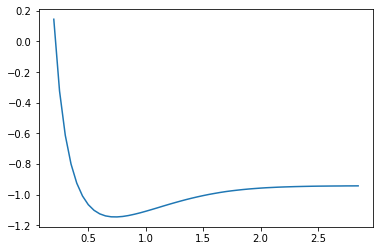

In [ ]:
plt.plot(*true_energies)

# RBM Solution

- Define the RBM

- Train it  

- Compare it to the true enery values

In [14]:
n_vis = 2
n_hin = 10

rbm = RBM(n_vis, n_hin)

epochs = 500 # number of training steps
num_samples = 1000 # number of samples to generate from the RBM to calculate the H2 energy

## Testing the code
Train the RBM:

In [ ]:
coeffs = np.loadtxt("H2_data/H2_coefficients.txt")
true_energies = []
rbm_energies = []

for coeff in coeffs[:2]:
    rbm.initialize_parameters()
    i = coeff[0]
    f = f"H2_data/R_{i}_samples.txt"
    training_data = torch.from_numpy(np.loadtxt(f))
    
    # True energy
    true_energy = H2_energy_calculator.energy_from_freq(training_data, coeff)
    true_energies += [ [i,true_energy] ]

    # RBM
    for e in range(1, epochs+1):
        # do one epoch of training
        rbm.train(training_data)   

        # now generate samples and calculate the energy
        if e % 100 == 0:
            print("\nEpoch: ", e)
            print("Sampling the RBM...")

            # For sampling the RBM, we need to do Gibbs sampling.
            # Initialize the Gibbs sampling chain with init_state as defined below.
            init_state = torch.zeros(num_samples, n_vis)
            RBM_samples = rbm.draw_samples(15, init_state)

            print("Done sampling. Calculating energy...")       

            energies = H2_energy_calculator.energy(RBM_samples, coeff, rbm.wavefunction) 
            print("Energy from RBM samples: ", energies.item())
        
    rbm_energies +=[ [i, energies.item()] ]
#     print(i)
#     print(f, '\n')

true_energies = np.array(true_energies).T 
rbm_energies = np.array(rbm_energies).T 
np.savez_compressed('energies', rbm=rbm_energies, true=true_energies)

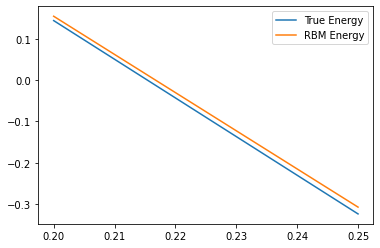

In [ ]:
plt.plot(*true_energies, label='True Energy')
plt.plot(*rbm_energies, label='RBM Energy')
plt.legend(loc=0)
plt.show()

## Full training

In [ ]:
n_vis = 2
n_hin = 10

rbm = RBM(n_vis, n_hin)

epochs = 500 # number of training steps
num_samples = 1000 # number of samples to generate from the RBM to calculate the H2 energy

In [ ]:
coeffs = np.loadtxt("H2_data/H2_coefficients.txt")
true_energies = []
rbm_energies = []

how_many_r = -1

for coeff in coeffs[:how_many_r]:
    rbm.initialize_parameters()
    i = coeff[0]
    f = f"H2_data/R_{i}_samples.txt"
    training_data = torch.from_numpy(np.loadtxt(f))
    
    # True energy
    true_energy = H2_energy_calculator.energy_from_freq(training_data, coeff)
    true_energies += [ [i,true_energy] ]

    # RBM
    for e in range(1, epochs+1):
        # do one epoch of training
        rbm.train(training_data)   

        # now generate samples and calculate the energy
        if e % 90 == 0:
            print(f'for this instance, r is ={i}. \n')
            print("\nEpoch: ", e)
            print("Sampling the RBM...")

            # For sampling the RBM, we need to do Gibbs sampling.
            # Initialize the Gibbs sampling chain with init_state as defined below.
            init_state = torch.zeros(num_samples, n_vis)
            RBM_samples = rbm.draw_samples(15, init_state)

            print("Done sampling. Calculating energy...")       

            energies = H2_energy_calculator.energy(RBM_samples, coeff, rbm.wavefunction) 
            print("Energy from RBM samples: ", energies.item())
        
    rbm_energies +=[ [i, energies.item()] ]
#     print(i)
#     print(f, '\n')

true_energies = np.array(true_energies).T 
rbm_energies = np.array(rbm_energies).T 
np.savez_compressed('energies', rbm=rbm_energies, true=true_energies)

In [16]:
data = np.load('energies.npz')
true_e = data['true']
rbm_e = data['rbm']

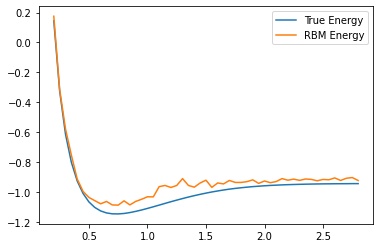

In [18]:
plt.plot(*true_e, label='True Energy')
plt.plot(*rbm_e, label='RBM Energy')
plt.legend(loc=0)
plt.savefig('prim_attempt.pdf')
plt.show()